In [72]:
import pandas as pd

# Load the dataset
file_path = r'C:\Users\4357\Desktop\Project\loan.csv'
loan_data = pd.read_csv(file_path)

# Display the first few rows and basic info about the dataset to understand its structure
loan_data_info = loan_data.info()
loan_data_head = loan_data.head()

loan_data_info, loan_data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


C:\Users\4357\AppData\Local\Temp\ipykernel_14216\3271372765.py:5: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv(file_path)


(None,
         id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
 0  1077501    1296599       5000         5000           4975.0   36 months   
 1  1077430    1314167       2500         2500           2500.0   60 months   
 2  1077175    1313524       2400         2400           2400.0   36 months   
 3  1076863    1277178      10000        10000          10000.0   36 months   
 4  1075358    1311748       3000         3000           3000.0   60 months   
 
   int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
 0   10.65%       162.87     B        B2  ...                NaN   
 1   15.27%        59.83     C        C4  ...                NaN   
 2   15.96%        84.33     C        C5  ...                NaN   
 3   13.49%       339.31     C        C1  ...                NaN   
 4   12.69%        67.79     B        B5  ...                NaN   
 
   num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
 0                NaN       

In [85]:
# Step 1: Check for missing values in the original dataset
missing_values = loan_data.isnull().sum()

# Step 2: Select relevant columns for analysis
relevant_columns = [
    'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
    'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
    'loan_status', 'purpose', 'dti', 'delinq_2yrs', 'revol_util', 'total_acc'
]

loan_data_clean = loan_data[relevant_columns].copy()  # Use `.copy()` to avoid SettingWithCopyWarning

# Step 3: Clean `int_rate` (convert percentage string to numeric)
loan_data_clean.loc[:, 'int_rate'] = (
    loan_data_clean['int_rate']
    .str.replace('%', '', regex=False)
    .astype(float)
)

# Step 4: Check cleaned data and missing values
cleaned_missing_values = loan_data_clean.isnull().sum()
loan_data_clean_sample = loan_data_clean.head()

cleaned_missing_values, loan_data_clean_sample


(loan_amnt             0
 funded_amnt           0
 funded_amnt_inv       0
 term                  0
 int_rate              0
 grade                 0
 sub_grade             0
 emp_length         1075
 home_ownership        0
 annual_inc            0
 loan_status           0
 purpose               0
 dti                   0
 delinq_2yrs           0
 revol_util           50
 total_acc             0
 dtype: int64,
    loan_amnt  funded_amnt  funded_amnt_inv        term int_rate grade  \
 0       5000         5000           4975.0   36 months    10.65     B   
 1       2500         2500           2500.0   60 months    15.27     C   
 2       2400         2400           2400.0   36 months    15.96     C   
 3      10000        10000          10000.0   36 months    13.49     C   
 4       3000         3000           3000.0   60 months    12.69     B   
 
   sub_grade emp_length home_ownership  annual_inc  loan_status  \
 0        B2  10+ years           RENT     24000.0   Fully Paid   
 1   

Column `revol_util` cleaned and converted to numeric.


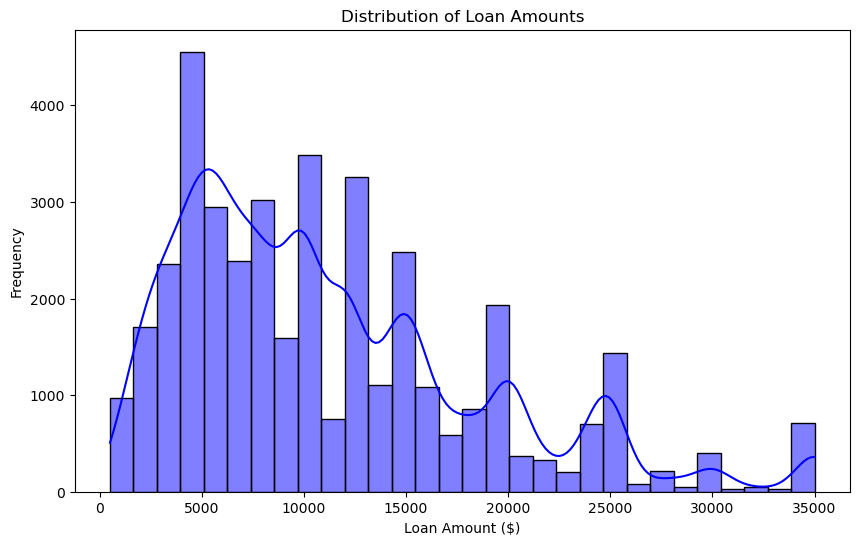

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# Clean `revol_util` column
try:
    loan_data_clean['revol_util'] = (
        loan_data_clean['revol_util']
        .astype(str)  # Convert to string for uniform processing
        .str.replace('%', '', regex=False)  # Remove percentage signs
    )
    loan_data_clean['revol_util'] = pd.to_numeric(loan_data_clean['revol_util'], errors='coerce')  # Convert to numeric
    loan_data_clean['revol_util'] = loan_data_clean['revol_util'].fillna(loan_data_clean['revol_util'].median())  # Fill missing values
    print("Column `revol_util` cleaned and converted to numeric.")
except Exception as e:
    print(f"Error during cleaning: {e}")

# Plot 1: Loan amount distribution
plt.figure(figsize=(10, 6))
sns.histplot(loan_data_clean['loan_amnt'], bins=30, kde=True, color='blue')
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Frequency')
plt.show()
              

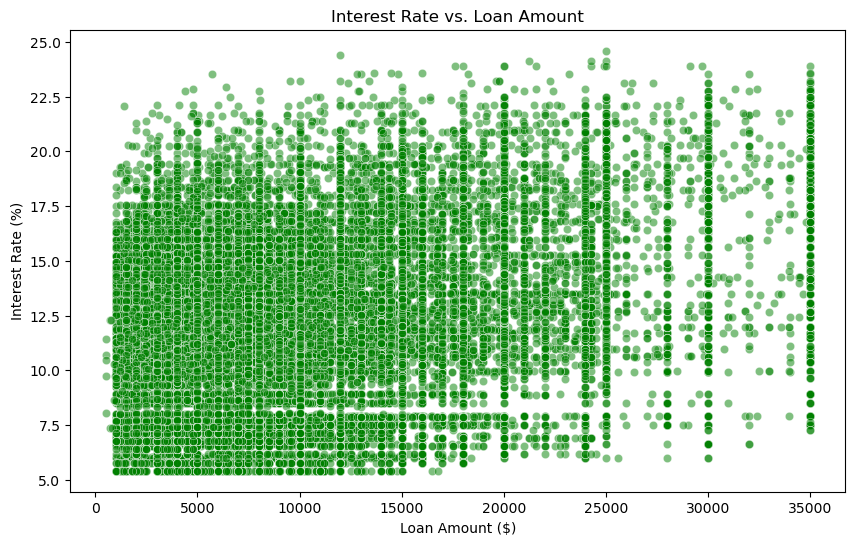

In [99]:
# Plot 2: Interest rate vs. loan amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='loan_amnt', y='int_rate', data=loan_data_clean, alpha=0.5, color='green')
plt.title('Interest Rate vs. Loan Amount')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Interest Rate (%)')
plt.show()


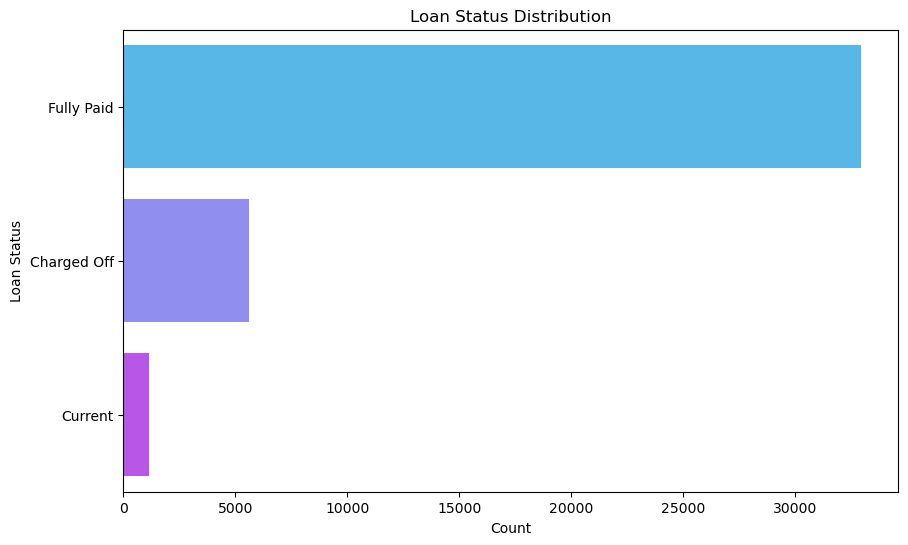

In [101]:
# Plot 3: Loan status counts
plt.figure(figsize=(10, 6))
sns.countplot(
    y='loan_status', 
    data=loan_data_clean, 
    order=loan_data_clean['loan_status'].value_counts().index, 
    hue='loan_status',  # Assign 'loan_status' to hue
    dodge=False,  # Avoid duplicate bars
    palette='cool'
)
plt.title('Loan Status Distribution')
plt.xlabel('Count')
plt.ylabel('Loan Status')
plt.legend([], [], frameon=False)  # Remove legend
plt.show()


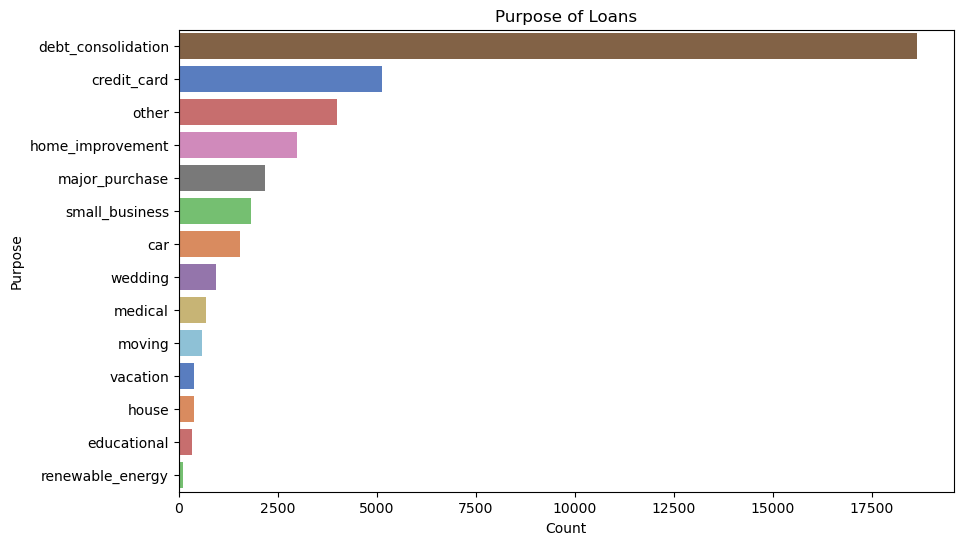

In [105]:
# Plot 4: Purpose of loans
plt.figure(figsize=(10, 6))
sns.countplot(
    y='purpose', 
    data=loan_data_clean, 
    order=loan_data_clean['purpose'].value_counts().index, 
    hue='purpose',  # Assign 'purpose' to hue
    dodge=False,  # Avoid duplicated bars
    palette='muted'
)
plt.title('Purpose of Loans')
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.legend([], [], frameon=False)  # Remove legend (optional)
plt.show()


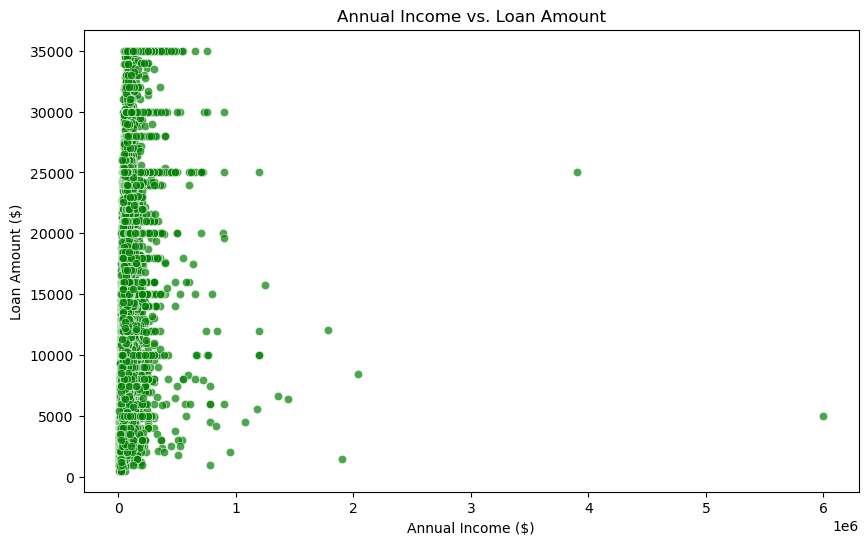

In [107]:
##Annual Income vs. Loan Amount Analyze 
plt.figure(figsize=(10, 6))
sns.scatterplot(x='annual_inc', y='loan_amnt', data=loan_data_clean, alpha=0.7, color='green')
plt.title('Annual Income vs. Loan Amount')
plt.xlabel('Annual Income ($)')
plt.ylabel('Loan Amount ($)')
plt.show()



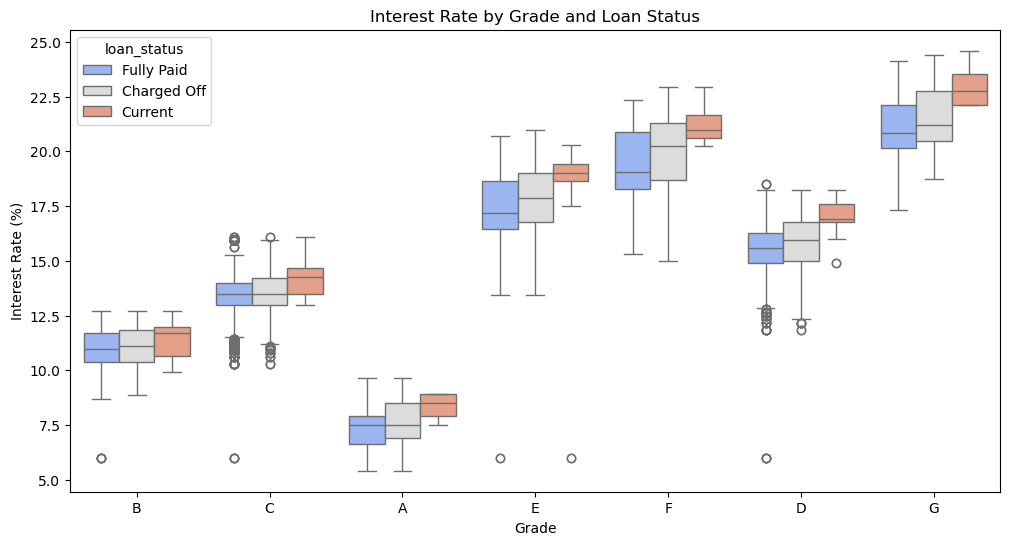

In [113]:
##Grade vs. Interest Rate by Loan Status:
plt.figure(figsize=(12, 6))
sns.boxplot(x='grade', y='int_rate', hue='loan_status', data=loan_data_clean, palette='coolwarm')
plt.title('Interest Rate by Grade and Loan Status')
plt.xlabel('Grade')
plt.ylabel('Interest Rate (%)')
plt.show()


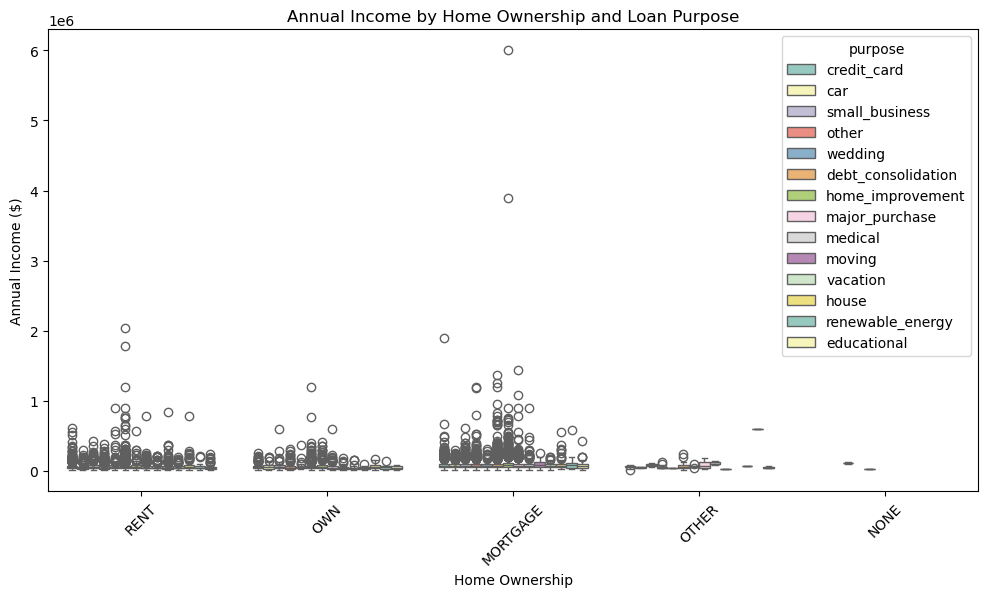

In [115]:
##Home Ownership vs. Annual Income by Loan Purpose
plt.figure(figsize=(12, 6))
sns.boxplot(x='home_ownership', y='annual_inc', hue='purpose', data=loan_data_clean, palette='Set3')
plt.title('Annual Income by Home Ownership and Loan Purpose')
plt.xlabel('Home Ownership')
plt.ylabel('Annual Income ($)')
plt.xticks(rotation=45)
plt.show()


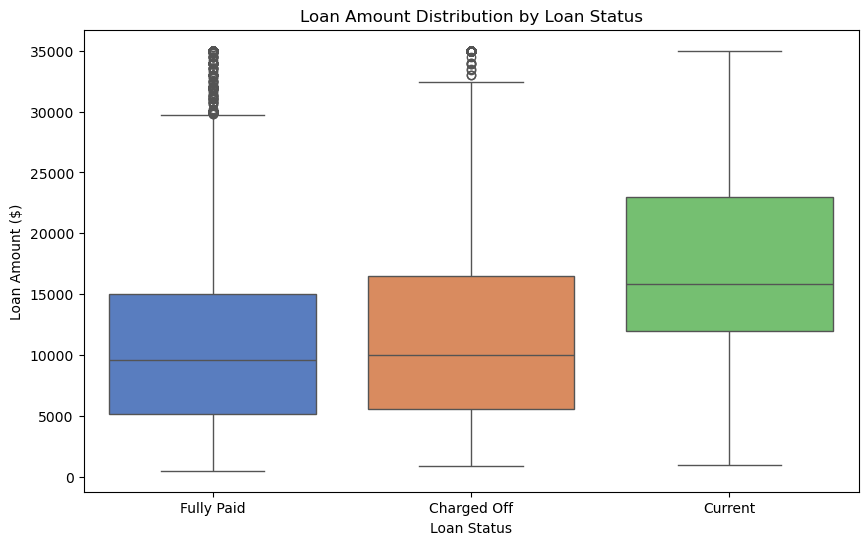

In [111]:
##Loan Status vs. Loan Amount Box plot to compare loan amounts across different loan statuses.
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='loan_status', 
    y='loan_amnt', 
    data=loan_data_clean, 
    hue='loan_status',  # Assign 'loan_status' to hue
    palette='muted'
)
plt.title('Loan Amount Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount ($)')
plt.legend([], [], frameon=False)  # Remove legend
plt.show()
